In [ ]:
!git clone https://github.com/xiaoyangxuoo/Houston_crime_prevention

Cloning into 'Houston_crime_prevention'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 32 (delta 8), reused 23 (delta 4), pack-reused 0
Unpacking objects: 100% (32/32), done.


In [ ]:
!pip install pycaret

     |████████████████████████████████| 264 kB 31.3 MB/s 
     |████████████████████████████████| 2.0 MB 39.0 MB/s 
     |████████████████████████████████| 14.4 MB 64 kB/s 
     |████████████████████████████████| 1.3 MB 42.8 MB/s 
     |████████████████████████████████| 1.7 MB 33.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 167 kB 71.1 MB/s 
     |████████████████████████████████| 105 kB 76.8 MB/s 
     |████████████████████████████████| 248 kB 69.5 MB/s 
     |████████████████████████████████| 6.8 MB 72.5 MB/s 
     |████████████████████████████████| 80 kB 9.8 MB/s 
     |████████████████████████████████| 271 kB 72.4 MB/s 
     |████████████████████████████████| 76 kB 5.3 MB/s 
     |████████████████████████████████| 3.1 MB 36.6 MB/s 
     |████████████████████

In [ ]:
import pandas as pd
import numpy as np
import cv2
import os 

In [ ]:
data = os.path.join('/content/Houston_crime_prevention/data', 'Final.csv')
df = pd.read_csv(data,header=0)

# data = os.path.join('/content/gdrive/My Drive/GIT project', 'HPD 2019.xlsx')
# df = pd.read_excel(data,header=0)
df.head()

,Unnamed: 0,Date,Hour,Reporting_Class,Category,Count,Beat,Premise,StreetName,City,Zip_Code,Zip_Code_Numeric,Month,Location_x,Poverty_rate,RegionName,Housing,Temperature,Weather_conditions,Year,Unemploy_value,Location_y,Median_household_income,Location,25+_w_high_school_or_higher_in_percent
0,0,2019-01-01,0,290,"Destruction, damage, vandalism",1,9C30,"Residence, Home (Includes Apartment)",SAN CARLOS,HOUSTON,77013,77013,1,77013.0,24.1,77013.0,132335.0,52.1,Clear,2019,50211,77013.0,38665.0,77013.0,61.2
1,1,2019-01-01,0,35A,"Drug, narcotic violations",1,7C10,"Highway, Road, Street, Alley",EAST,HOUSTON,77020,77020,1,77020.0,30.0,77020.0,117754.0,52.1,Clear,2019,50211,77020.0,32207.0,77020.0,63.8
2,2,2019-01-01,0,290,"Destruction, damage, vandalism",1,16E40,"Residence, Home (Includes Apartment)",LONE QUAIL,HOUSTON,77489,77489,1,NaN,NaN,NaN,NaN,52.1,Clear,2019,50211,NaN,NaN,NaN,NaN
3,3,2019-01-01,0,13A,Aggravated Assault,1,15E30,"Residence, Home (Includes Apartment)",OSBY,HOUSTON,77025,77025,1,77025.0,9.7,77025.0,416531.0,52.1,Clear,2019,50211,77025.0,76772.0,77025.0,92.7
4,4,2019-01-01,0,23H,All other larceny,1,15E30,"Residence, Home (Includes Apartment)",OSBY,HOUSTON,77025,77025,1,77025.0,9.7,77025.0,416531.0,52.1,Clear,2019,50211,77025.0,76772.0,77025.0,92.7


In [ ]:
### cleaning of the dataframe after the combination
df = df[['Date', 'Hour', 'Reporting_Class','Category', 'Count', 'Beat','Premise','StreetName', 'City', 'Zip_Code', 'Month', 'Poverty_rate','Housing','Temperature','Weather_conditions','Unemploy_value','Median_household_income','25+_w_high_school_or_higher_in_percent']]

In [ ]:
df.head()

,Date,Hour,Reporting_Class,Category,Count,Beat,Premise,StreetName,City,Zip_Code,Month,Poverty_rate,Housing,Temperature,Weather_conditions,Unemploy_value,Median_household_income,25+_w_high_school_or_higher_in_percent
0,2019-01-01,0,290,"Destruction, damage, vandalism",1,9C30,"Residence, Home (Includes Apartment)",SAN CARLOS,HOUSTON,77013,1,24.1,132335.0,52.1,Clear,50211,38665.0,61.2
1,2019-01-01,0,35A,"Drug, narcotic violations",1,7C10,"Highway, Road, Street, Alley",EAST,HOUSTON,77020,1,30.0,117754.0,52.1,Clear,50211,32207.0,63.8
2,2019-01-01,0,290,"Destruction, damage, vandalism",1,16E40,"Residence, Home (Includes Apartment)",LONE QUAIL,HOUSTON,77489,1,NaN,NaN,52.1,Clear,50211,NaN,NaN
3,2019-01-01,0,13A,Aggravated Assault,1,15E30,"Residence, Home (Includes Apartment)",OSBY,HOUSTON,77025,1,9.7,416531.0,52.1,Clear,50211,76772.0,92.7
4,2019-01-01,0,23H,All other larceny,1,15E30,"Residence, Home (Includes Apartment)",OSBY,HOUSTON,77025,1,9.7,416531.0,52.1,Clear,50211,76772.0,92.7


In [ ]:
temp = df[['Zip_Code', 'Count']].groupby(['Zip_Code']).sum().reset_index()
agg_df = df.merge(temp, left_on='Zip_Code', right_on = 'Zip_Code')
agg_df.head()
temp2 = df[['Zip_Code','Temperature']].groupby(['Zip_Code']).mean().reset_index()


agg_df = agg_df.merge(temp2, left_on='Zip_Code', right_on = 'Zip_Code')
temp3 = agg_df[['Zip_Code','Unemploy_value']].groupby(['Zip_Code']).mean().reset_index()
agg_df = agg_df.merge(temp3, left_on='Zip_Code', right_on = 'Zip_Code')


temp4 = agg_df[['Zip_Code','Housing']].groupby(['Zip_Code']).mean().reset_index()
agg_df = agg_df.merge(temp4, left_on='Zip_Code', right_on = 'Zip_Code')
agg_df.drop(columns=['Date', 'Hour','Reporting_Class', 'Category','Beat','Count_x','Premise','StreetName', 'City', 'Month','Temperature_x','Unemploy_value_x', 'Housing_x','Weather_conditions'], inplace=True)
agg_df.head()

,Zip_Code,Poverty_rate,Median_household_income,25+_w_high_school_or_higher_in_percent,Count_y,Temperature_y,Unemploy_value_y,Housing_y
0,77013,24.1,38665.0,61.2,2202,73.036351,42887.236493,136434.423697
1,77013,24.1,38665.0,61.2,2202,73.036351,42887.236493,136434.423697
2,77013,24.1,38665.0,61.2,2202,73.036351,42887.236493,136434.423697
3,77013,24.1,38665.0,61.2,2202,73.036351,42887.236493,136434.423697
4,77013,24.1,38665.0,61.2,2202,73.036351,42887.236493,136434.423697


In [ ]:
#from pycaret.classification import *
from pycaret.regression import *
from pycaret.clustering import *
#from pycaret.anomaly import *
#from pycaret.nlp import *
#from pycaret.arules import *

In [ ]:
agg_df.drop_duplicates(inplace=True, ignore_index=True)


In [ ]:
agg_df.drop(columns=['Zip_Code'], inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler
num = agg_df[['Poverty_rate', 'Median_household_income', '25+_w_high_school_or_higher_in_percent', 'Temperature_y', 'Unemploy_value_y', 'Housing_y']]
scaler = StandardScaler()
scaler.fit(num)
num = scaler.transform(num)
num

array([[ 1.10634520e+00, -8.77972137e-01, -1.34702963e+00,
        -8.83441069e-02, -1.87400915e-01, -6.41044488e-01],
       [ 1.75287226e+00, -1.08251752e+00, -1.16151256e+00,
        -1.01565506e-01, -7.78162002e-02, -7.20048184e-01],
       [            nan,             nan,             nan,
         2.96514015e-02, -2.51596105e-02,             nan],
       [-4.71619152e-01,  3.28997644e-01,  9.00581136e-01,
         5.39061177e-03, -8.49493190e-02,  9.59414694e-01],
       [ 5.91315166e-01, -7.96793783e-01, -1.02594238e+00,
        -6.10243603e-02, -9.64573491e-02, -5.60051254e-01],
       [ 3.50237279e-01, -3.41871932e-01, -3.55226787e-01,
         2.24090564e-02, -1.86539144e-01,  1.24217315e+00],
       [ 2.40656422e-01, -5.27635119e-01,  7.07928785e-01,
        -7.45564520e-02, -5.96385563e-02, -6.51266254e-02],
       [ 1.04059668e+00, -8.42023080e-01, -1.51114090e+00,
        -1.24105621e-01, -8.88969550e-02, -6.09218540e-01],
       [ 1.81862077e+00, -1.19429216e+00, -1.118

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
imput = imputer.fit_transform(num)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(imput, agg_df['Count_y'].values.reshape((-1,)))

RandomForestRegressor(max_depth=3, random_state=0)

In [ ]:
pred = regr.predict(imput)

In [ ]:
from sklearn.metrics import mean_squared_error
print('Mean squared error')
mean_squared_error(agg_df['Count_y'].values.reshape((-1,)), pred)

Mean squared error


907764.452840156

In [ ]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error')
mean_absolute_error(agg_df['Count_y'].values.reshape((-1,)), pred)

Mean absolute error


700.7745776472782

In [ ]:
from sklearn.metrics import r2_score
print('R2')
r2_score(agg_df['Count_y'].values.reshape((-1,)), pred)

R2


0.6630600436102518

In [ ]:
rf_feature = regr.feature_importances_
rf_feature_df = pd.DataFrame(rf_feature).transpose()
rf_feature_df
rf_feature_df.columns = [['Poverty_rate', 'Median_household_income', '25+_w_high_school_or_higher_in_percent', 'Temperature_y', 'Unemploy_value_y', 'Housing_y']]

In [ ]:
rf_feature_df

,Poverty_rate,Median_household_income,25+_w_high_school_or_higher_in_percent,Temperature_y,Unemploy_value_y,Housing_y
0,0.195648,0.295845,0.08568,0.162563,0.206675,0.05359


In [ ]:
N= agg_df['Count_y'].shape[0]
p=6
r2 = 0.6630600436102518
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print(adj_rsquared)

0.6501008145183385


In [ ]:
reg = pycaret.regression.setup(data = agg_df, target = 'Count_y', numeric_imputation='median', normalize=True)

In [ ]:
best = compare_models()

In [ ]:
rf = create_model('rf')


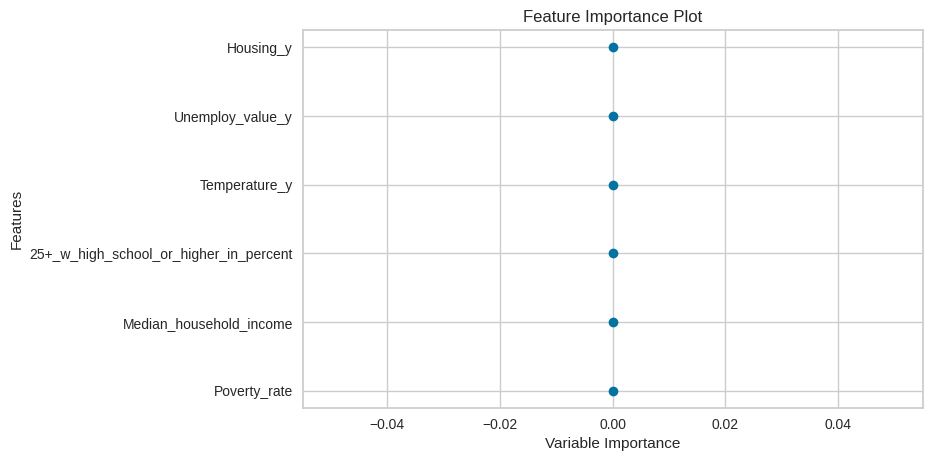

In [ ]:
plot_model(rf, plot='feature')

In [ ]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(df['Premise'].values)
# transformed_prem = le.transform(df['Premise'].values)

(array([    0., 16629., 15432., 17187., 17753., 19410., 18027., 19235.,
        19252., 18043., 18722., 18001., 18601.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 13 Patch objects>)

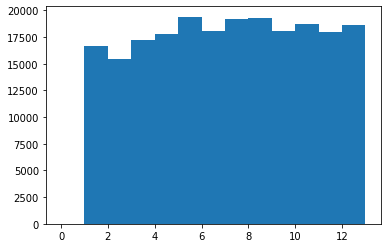

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['Month'].values,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])

In [ ]:
from collections import Counter
counter = Counter()
counter

Counter()

Text(0.5, 1.0, 'Gaussian Kernel Density for monthly data')

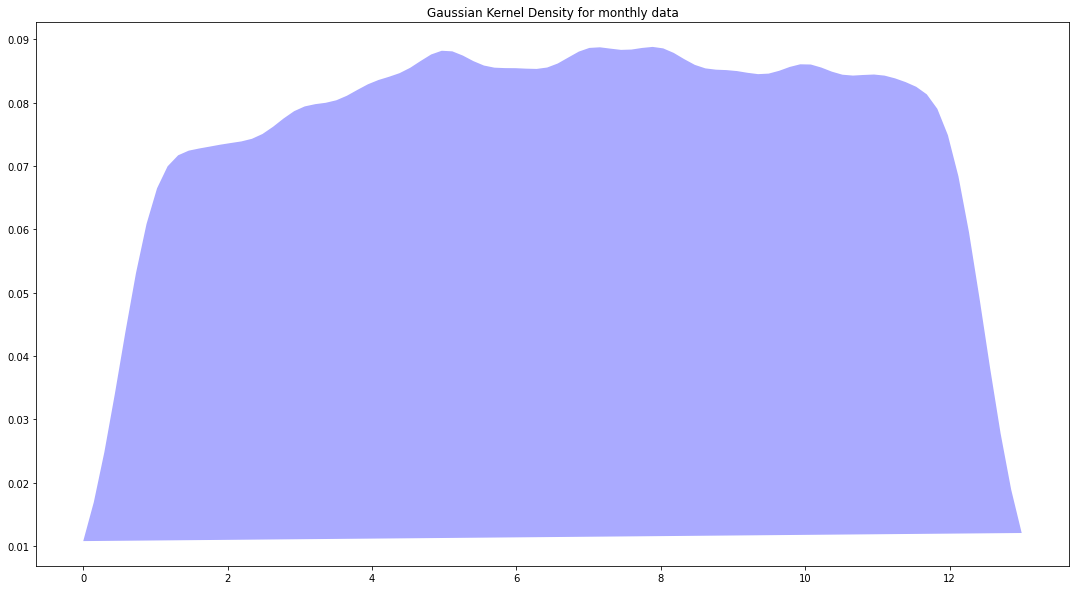

In [ ]:
from sklearn.neighbors import KernelDensity
import numpy as np
data = df['Month'].values
N_points = len(data)
#kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(data)
#kde.score_samples(X)



X_plot_amy = np.linspace(0, 13, 90)[:, np.newaxis]
h_amy = np.std(data)*1.06*N_points**(-1/5)
kde_amy = KernelDensity(kernel='gaussian', bandwidth = 0.55).fit(data.reshape(-1, 1))
log_dens_amy = kde_amy.score_samples(X_plot_amy)



# X_plot_acc = np.linspace(-2, 3, 90)[:, np.newaxis]
# h_acc = np.std(data[:,1])*1.06*N_points**(-1/5)
# kde_acc = KernelDensity(kernel='gaussian', bandwidth = h_acc).fit(data[:,1].reshape(-1, 1))
# log_dens_acc = kde_acc.score_samples(X_plot_acc)

fig = plt.figure(figsize=(20,20))
fig.set_size_inches(18.5, 10)
fig.subplots_adjust(hspace=0.5, wspace=0.51)
plt.fill(X_plot_amy[:, 0], np.exp(log_dens_amy), fc='#AAAAFF')
plt.title('Gaussian Kernel Density for monthly data')
# ax[1].fill(X_plot_acc[:, 0], np.exp(log_dens_acc), fc='#AAAAFF')
# ax[1].set_title('Gaussian Kernel Density for acc')

In [ ]:
h_amy

In [ ]:
china_town = df[df["Zip_Code"]==77036]

In [ ]:
china_town_copy = china_town.copy()

In [ ]:
china_town_copy.tail()

In [ ]:
china_town_copy = china_town.copy()

china_town_copy.drop(columns=['Date', 'Count','City','Zip_Code','Poverty_rate', 'Housing','Unemploy_value','Median_household_income','25+_w_high_school_or_higher_in_percent'], inplace=True)
china_town_copy.head()


In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install kmodes

In [ ]:
#Clustering的提高：我们目前的典型案例东西太杂，看不出特点，也无法plot出图像，可以考虑使用不同的使用案例来进行Clustering？

#case1: 片警巡逻使用： 时间固定在18：00-22:00 Beat锁定18F60， Clustering Street name，就看一下数据会预测在哪里可能会发生案件
#case2: 片警巡逻使用提升： 增加温度设定在47-48，天气clear,看看数据是否有变化。
#case3: 片警巡逻地图： 时间固定在18：00，19：00，20：00，21：00，22：00，beat锁定18FF60，看一下每个小时的案件发生在哪里，有没有不同，然后看地图如何规划





In [ ]:
case1 = china_town_copy[china_town_copy['Hour']<=22 ]
case1 = case1[case1['Hour']>=14]
case1 = case1[case1['Beat']=='19G10']
case1.head()

In [ ]:
import numpy as np
from sklearn import datasets

from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes

#iris = datasets.load_iris()

data = case1[['Hour','StreetName', 'Premise']]

kp = KModes(n_clusters=8, init='Huang', n_init=1, verbose=True)
kp.fit_predict(data, categorical=[0, 1, 2])

print(kp.cluster_centroids_)
print(kp.labels_)

In [ ]:
#cat_feature = case1[['Hour', 'Category', 'Beat', 'Premise', 'StreetName', 'Month', 'Weather_conditions']]
cat_feature = case1[['Hour','StreetName','Premise']]

In [ ]:
#temp = case1['Temperature'].values

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(cat_feature)
hour_st_res = enc.transform(cat_feature).toarray()
#case1_enc = np.hstack((case1_enc, temp.reshape(958,1)))

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# pca.fit(case1_enc)
# plt.plot(pca.components_[0], pca.components_[1])

In [ ]:
#case1['Temperature'].shape

In [ ]:
hour_st_res.shape

In [ ]:
#case1_enc = np.hstack((case1['Temperature'].values.reshape((590,1)), cat_enc))

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 40)

 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(hour_st_res)
    # kmeanModel.fit(case1_enc)
 
    distortions.append(sum(np.min(cdist(hour_st_res, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / hour_st_res.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(hour_st_res, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / hour_st_res.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(hour_st_res)

In [ ]:
cnts = kmeans.cluster_centers_

In [ ]:
pd.DataFrame(cnts)

In [ ]:
labels = kmeans.labels_

In [ ]:
#kmean_pred = np.hstack((case1.values, labels.reshape((590, 1))))
#kmean_pred = np.hstack((case1['StreetName'].values, labels.reshape((590, 1))))

In [ ]:
kmean_pred_df = pd.DataFrame(kmean_pred)

In [ ]:
pd.set_option("display.max_rows", None)

In [ ]:
kmean_pred_df.head(500)

In [ ]:
cnts_df = pd.DataFrame(cnts)
cnts_df_final = pd.DataFrame(enc.inverse_transform(cnts_df))
cnts_df_final.columns = ['Hour', 'StreetName', 'Premise']
cnts_df_final

In [ ]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(20,20))
plt.hist(case1['StreetName'].values) 


In [ ]:
from collections import  Counter
counter = Counter()

In [ ]:
#china_town_copy.drop(columns=['Poverty_rate','Median_household_income','25+_w_high_school_or_higher_in_percent'], inplace=True)
temp1 = pycaret.classification.setup(data = china_town_copy, target='t_prem', categorical_features=['Hour','Category','Month','Weather_conditions'],categorical_imputation='mode',
                                 numeric_features = ['Housing','Temperature','Unemploy_value']
                                 ,numeric_imputation = 'median', normalize = True)

In [ ]:
best_model = compare_models()

In [ ]:
lr = create_model('lr')
print(lr)

In [ ]:
tuned_lr = tune_model(lr)

In [ ]:
plot_model(tuned_lr, plot='pr')

In [ ]:
china_town_copy = china_town.copy()

china_town_copy.drop(columns=['Date', 'Count','City','Zip_Code','Poverty_rate', 'Housing','Unemploy_value','Median_household_income','25+_w_high_school_or_higher_in_percent','t_prem'], inplace=True)
china_town_copy.head()

In [ ]:
from pycaret.clustering import *
clu1 = pycaret.clustering.setup(data = china_town_copy, categorical_features=['Hour','Category','Beat','Premise','StreetName','Month','Weather_conditions'],categorical_imputation='mode',
                                 numeric_features = ['Temperature']
                                 ,numeric_imputation = 'median', normalize = True)

In [ ]:
kmeans = create_model('kmeans')
# plotting a model


In [ ]:
las = create_model('lasso')
tuned_las = tune_model(las)